In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv("https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/iris.csv");

In [3]:
iris[:5]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
y = iris["Petal.Length"]

In [5]:
y

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: Petal.Length, Length: 150, dtype: float64

In [6]:
x = iris["Sepal.Length"]

In [7]:
x

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

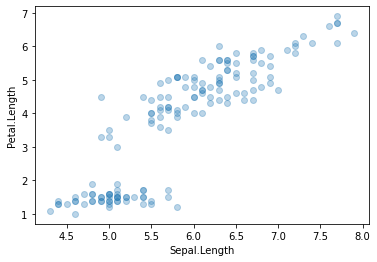

In [8]:
x = iris["Sepal.Length"]
y = iris["Petal.Length"]
fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(x,y,alpha=0.3)
ax.set_xlabel('Sepal.Length')
ax.set_ylabel('Petal.Length')
plt.show()

In [9]:
import sklearn.linear_model
ones = np.ones(len(iris))
x = iris["Sepal.Length"]
y = iris["Petal.Length"]
# A linear model with three feature vectors [one, x, x**2] and the response vector y
features = np.column_stack((ones,x,x**2))
model = sklearn.linear_model.LinearRegression(fit_intercept=False) # fit_intercept=False sets the y-intercept to 0. If fit_intercept=True, the y-intercept will be determined by the line of best fit
model.fit(features,y)
(alpha,beta,gamma) = model.coef_
(alpha,beta,gamma)

(-17.446713871472127, 5.392164163305714, -0.2958593390730284)

In [10]:
# alternatively:
# the sklearn model fitting function always includes a one vector, unless we explicitly tell it otherwise with fit_intercept=False
# fit_intercept=False sets the y-intercept to 0. If fit_intercept=True, the y-intercept will be determined by the line of best fit
x = iris["Sepal.Length"]
y = iris["Petal.Length"]
features = np.column_stack((x,x**2))
model = sklearn.linear_model.LinearRegression()
model.fit(features,y)
alpha,(beta,gamma) = model.intercept_,model.coef_
(alpha,beta,gamma)

(-17.446713871472316, 5.392164163305781, -0.29585933907303447)

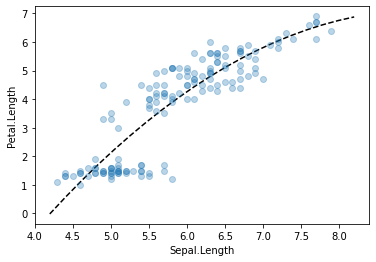

In [11]:
x = iris["Sepal.Length"]
y = iris["Petal.Length"]

# what does the fit look like and use it to predict new y values
new_x = np.linspace(4.2,8.2,20)
new_features = np.column_stack((new_x,new_x**2))
predictions = model.predict(new_features)

# plot the scatter graph & best fit line
fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(x,y,alpha=0.3)
ax.set_xlabel('Sepal.Length')
ax.set_ylabel('Petal.Length')
ax.plot(new_x,predictions,'k--',zorder=-1) # zorder = which layer
plt.show()

Text(0, 0.5, 'Petal.Length')

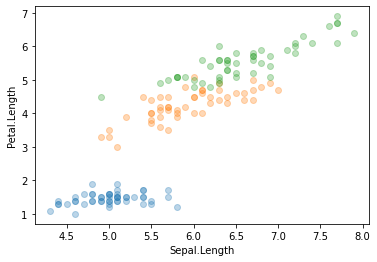

In [12]:
x_s = iris.loc[iris["Species"] == 'setosa']['Sepal.Length']
y_s = iris.loc[iris["Species"] == 'setosa']['Petal.Length']
x_v = iris.loc[iris["Species"] == 'versicolor']['Sepal.Length']
y_v = iris.loc[iris["Species"] == 'versicolor']['Petal.Length']
x_g = iris.loc[iris["Species"] == 'virginica']['Sepal.Length']
y_g = iris.loc[iris["Species"] == 'virginica']['Petal.Length']

fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(x_s,y_s, alpha = 0.3)
ax.scatter(x_v,y_v, alpha = 0.3)
ax.scatter(x_g,y_g, alpha = 0.3)
ax.set_xlabel('Sepal.Length')
ax.set_ylabel('Petal.Length')

In [13]:
species_all, SL, PL = iris['Species'],iris['Sepal.Length'],iris['Petal.Length']
species_level = np.unique(species_all)
species_onehot = [np.where(species_all==k,1,0) for k in species_level] # one-hot encoding
print(species_onehot)
features = np.column_stack(species_onehot+[s * SL for s in species_onehot]) # i1 * SL is elementwise multiplication of two vectors
model = sklearn.linear_model.LinearRegression(fit_intercept=False) # fit_intercept=False sets the y-intercept to 0.
model.fit(features,PL)
(alpha_seto, alpha_virg, alpha_vers, beta_seto, beta_virg, beta_vers) = model.coef_

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

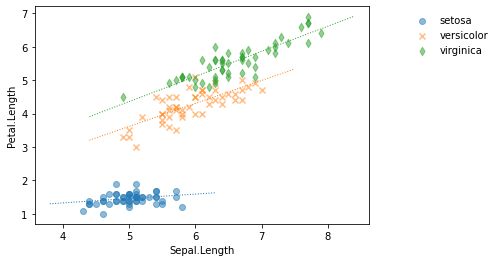

In [14]:
# make predictions
# get range of Sepal.Length we want to plot (slightly wider than the train data range)
# min_all = iris.groupby('Species')['Sepal.Length'].min().reset_index()['Sepal.Length']
# max_all = iris.groupby('Species')['Sepal.Length'].max().reset_index()['Sepal.Length']
pred = (iris.groupby('Species')['Sepal.Length'].apply(lambda x:pd.DataFrame({'Sepal.Length':np.linspace(min(x)-0.5, max(x)+0.5,20)})).reset_index())

new_onehot = [np.where(pred['Species']==k,1,0) for k in species_level]
new_SL = pred['Sepal.Length']
new_features = np.column_stack(new_onehot + [s * new_SL for s in new_onehot])
pred['Petal.Length'] = model.predict(new_features)

# plot the three linear equations on the original graph
fig,ax = plt.subplots(figsize=(6,4))
for k,m in zip(species_level, ['o','x','d']):
  df = iris.loc[iris['Species']==k]
  ax.scatter(df['Sepal.Length'], df['Petal.Length'], marker=m, label=k, alpha = 0.5) # plot scatter graph
  df = pred.loc[pred['Species']==k] 
  ax.plot(df['Sepal.Length'],df['Petal.Length'],label = k, zorder = -1, linewidth = 1, linestyle = 'dotted')

ax.set_ylabel('Petal.Length')
ax.set_xlabel('Sepal.Length')
h,l = ax.get_legend_handles_labels()
# path collection h[3:]
leg = plt.legend(h[3:], l[3:], loc=2, bbox_to_anchor=(1.1,1), frameon=False)

In [15]:
# polynomial model
SL = iris['Sepal.Length']
new_SL = np.linspace(1,9,100)
degree = [2,3,4,10]
pred = []
for d in degree:
  features = np.column_stack([SL**i for i in range(1,d+1)])
  model_ploy = sklearn.linear_model.LinearRegression()
  model_ploy.fit(features,iris['Petal.Length'])
  new_features = np.column_stack([new_SL**i for i in range(1,d+1)])
  new_y = model_ploy.predict(new_features)
  pred.append(pd.DataFrame({'degree':d, 'Sepal.Length':new_SL, 'Petal.Length':new_y}))

pred = pd.concat(pred,axis=0)
pred

,degree,Sepal.Length,Petal.Length
0,2,1.000000,-12.350409
1,2,1.080808,-11.964426
2,2,1.161616,-11.582307
3,2,1.242424,-11.204052
4,2,1.323232,-10.829661
...,...,...,...
95,10,8.676768,-185.344940
96,10,8.757576,-278.947720
97,10,8.838384,-409.652748
98,10,8.919192,-589.361973


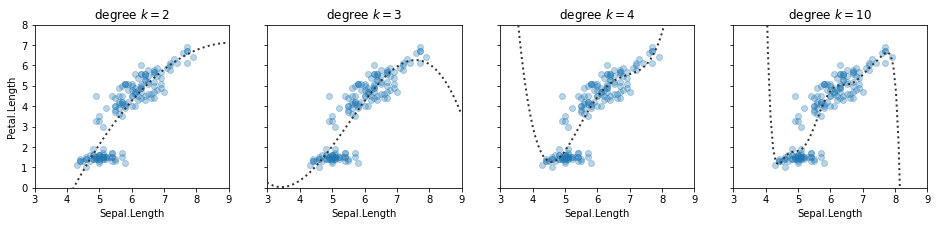

In [16]:
# plot the graph
fig,axs = plt.subplots(1,len(degree), sharex=True, sharey=True,figsize = (16,3))
for ax,d in zip(axs,degree):
  ax.scatter(SL,PL, alpha = 0.3)
  df = pred.loc[pred.degree==d]
  ax.plot(df['Sepal.Length'], df['Petal.Length'], zorder=10, label=f'k={d}', color='0.2', linewidth=2, linestyle='dotted')
  ax.set_title(f'degree $k={d}$')
  ax.set_xlim(3,9)
  ax.set_xlabel('Sepal.Length')

axs[0].set_ylim(0,8)
axs[0].set_ylabel('Petal.Length')
plt.show()

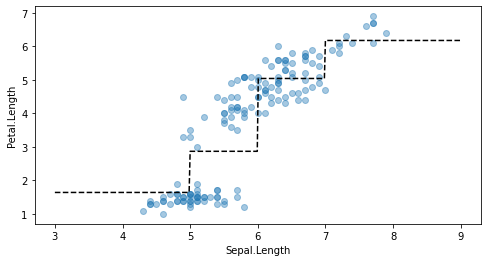

In [17]:
# step function
SL_floors = np.floor(iris['Sepal.Length'])
features = np.column_stack([SL_floors<=4,SL_floors==5,SL_floors==6,SL_floors>=7])
model_step = sklearn.linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False -> intercept at y = 0
model_step.fit(features,iris['Petal.Length'])

new_SL = np.linspace(3,9,400)
new_SL_floors = np.floor(new_SL)
new_features = np.column_stack([new_SL_floors<=4,new_SL_floors==5,new_SL_floors==6,new_SL_floors>=7])
new_y = model_step.predict(new_features)

# plot the graph
fig,ax = plt.subplots(figsize=(8,4))
ax.scatter(iris['Sepal.Length'],iris['Petal.Length'], alpha=0.4)
ax.plot(new_SL,new_y, 'k--')
ax.set_xlabel('Sepal.Length')
ax.set_ylabel('Petal.Length')
plt.show()

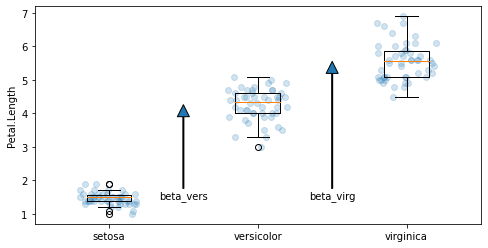

In [18]:
species,PL,SL = iris['Species'], iris['Petal.Length'], iris['Sepal.Length']
species_level = np.unique(species.loc[species!='setosa'])
features = np.column_stack([np.where(species==i,1,0) for i in species_level])
model_one_hot = sklearn.linear_model.LinearRegression()
model_one_hot.fit(features,PL)
# beta_1 and beta_2 are difference with respect to the sepecies = setosa
alpha, (beta_1,beta_2) = model_one_hot.intercept_, model_one_hot.coef_
# (alpha, beta_1, beta_2) = (1.4620000000000002, 2.798000000000001, 4.09)

# box plot + scatter plot, box plot to show the difference between species
# convert species levels into intergers, start at 1
species_level = np.unique(species)
species_ones = np.ones_like(species)
for i,l in enumerate(species_level):
  species_ones[species==l] = i + 1

fig,ax = plt.subplots(figsize=(8,4))
ax.scatter(species_ones + 0.2 * np.random.uniform(low=-1,high=1,size=len(iris)), PL, alpha=.2)
ax.boxplot([PL[species==k] for k in species_level], labels = species_level)
ax.set_ylabel('Petal.Length')

plt.annotate('beta_vers', xytext=(1.5,alpha), xy=(1.5,alpha+beta_1), ha="center", arrowprops={'width':1})
plt.annotate('beta_virg', xytext=(2.5,alpha), xy=(2.5,alpha+beta_2), ha="center", arrowprops={'width':1})
plt.show()

In [81]:
# supervision 1 question 11

# assume PL and SL are the corresponding petal and sepal vectors
PL,SL = iris['Petal.Length'], iris['Sepal.Length']
# transform c -> c = e^t
def mse(par):
	a,b,t = par
	c = math.exp(t) 
	return np.power(PL - (a - b * np.power(SL, c)), 2)

init = [1,1,1]
a_, b_, t_ = scipy.optimize.fmin(lambda par : np.sum(mse(par)), init, maxiter=200)
c_ = math.exp(t_)
a_, b_, c_

Optimization terminated successfully.
         Current function value: 464.325400
         Iterations: 190
         Function evaluations: 378


(15.17104444716114, 11.413044479079339, 3.6470255731057124e-17)

In [19]:
temp = pd.read_csv("https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/climate.csv")

temp = temp.loc[(temp['station'] == 'Cambridge') & (temp['yyyy'] >= 1985) & (temp['tmax'].isna()==False)& (temp['tmin'].isna()==False)].copy()
temp['date'] = temp['yyyy'] + (temp['mm']-1)/12
temp['tmean'] = (temp['tmax'] + temp['tmin'])/2
temp

,yyyy,mm,tmax,tmin,af,rain,sun,status,station,lat,lng,height,date,tmean
6586,1985.0,1.0,3.4,-2.2,23,37.3,40.7,NaN,Cambridge,52.245,0.102,26,1985.000000,0.60
6587,1985.0,2.0,4.9,-1.9,13,14.6,79.0,NaN,Cambridge,52.245,0.102,26,1985.083333,1.50
6588,1985.0,3.0,8.7,1.1,10,45.8,97.8,NaN,Cambridge,52.245,0.102,26,1985.166667,4.90
6589,1985.0,4.0,12.9,4.9,2,31.2,139.3,NaN,Cambridge,52.245,0.102,26,1985.250000,8.90
6590,1985.0,5.0,15.4,7.1,0,49.0,132.7,NaN,Cambridge,52.245,0.102,26,1985.333333,11.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009,2020.0,4.0,16.8,4.6,1,29.8,---,Provisional,Cambridge,52.245,0.102,26,2020.250000,10.70
7010,2020.0,5.0,19.4,6.7,2,1.6,---,Provisional,Cambridge,52.245,0.102,26,2020.333333,13.05
7011,2020.0,6.0,21.2,10.6,0,51.0,---,Provisional,Cambridge,52.245,0.102,26,2020.416667,15.90
7012,2020.0,7.0,21.9,12.4,0,50.6,---,Provisional,Cambridge,52.245,0.102,26,2020.500000,17.15


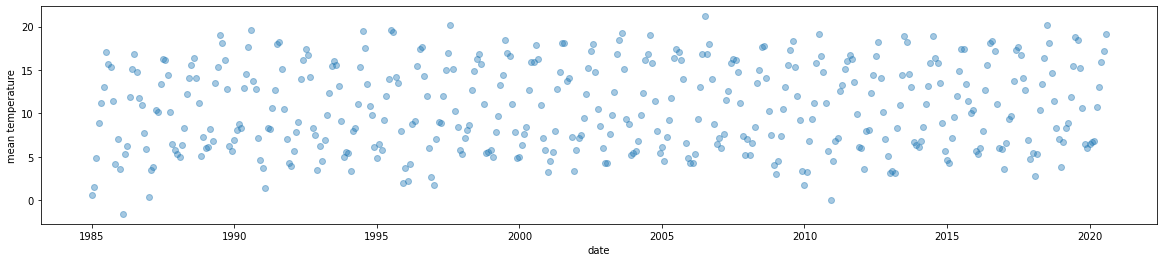

In [20]:
fig,ax = plt.subplots(figsize=(20,4))
ax.scatter(temp['date'],temp['tmean'],alpha = 0.4)
ax.set_xlabel('date')
ax.set_ylabel('mean temperature')
plt.show()

In [21]:
import math
t = temp['date']
features = np.column_stack([np.sin(2*np.pi*t), np.cos(2*np.pi*t)])
model = sklearn.linear_model.LinearRegression()
model.fit(features,temp['tmean'])
alpha,(beta_1,beta_2) = model.intercept_, model.coef_
alpha,beta_1,beta_2

(10.613180427684894, -1.0542440592232987, -6.542703353873162)

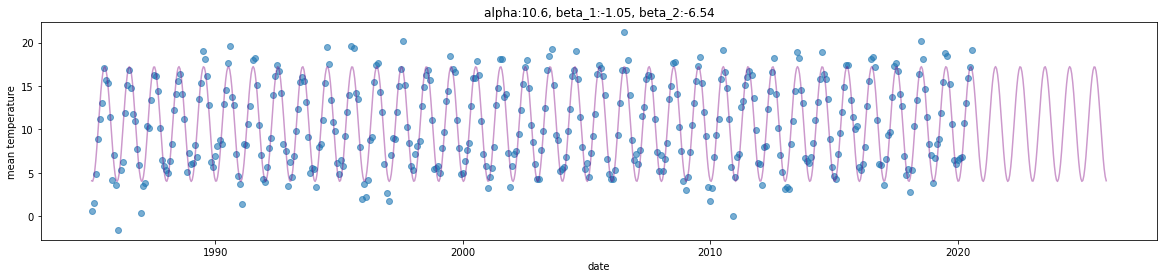

In [22]:
# make predictions
new_t = np.linspace(1985,2026,1000)
new_features = np.column_stack([np.sin(2*np.pi*new_t), np.cos(2*np.pi*new_t)])
new_y = model.predict(new_features)

# plot the graph
fig,ax = plt.subplots(figsize=(20,4))
ax.scatter(temp['date'],temp['tmean'],alpha = 0.6)
ax.plot(new_t, new_y, c="purple", alpha = 0.4)
ax.set_xlabel('date')
ax.set_ylabel('mean temperature')
ax.set_title(f'alpha:{alpha:.3}, beta_1:{beta_1:.3}, beta_2:{beta_2:.3}')
plt.show()

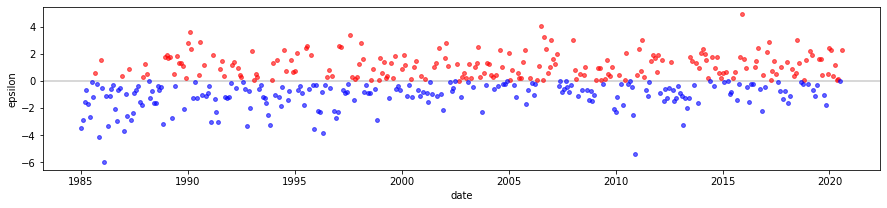

In [23]:
# find the residual plot
epsilon = temp['tmean'] - model.predict(features)

fig,ax = plt.subplots(figsize=(15,3))
ax.axhline(0,color='0.8',zorder=-1)
ax.scatter(t[epsilon>0],epsilon[epsilon>0], color='red', s=15,alpha=.6)
ax.scatter(t[epsilon<=0],epsilon[epsilon<=0], color='blue', s=15,alpha=.6)
ax.set_xlabel('date')
ax.set_ylabel('epsilon')

plt.show()

In [24]:
# train the model
t = temp['date']
features = np.column_stack([np.sin(2*np.pi*t),np.cos(2*np.pi*t),t])
model2 = sklearn.linear_model.LinearRegression()
model2.fit(features,temp['tmean'])
alpha,(beta_1,beta_2,gamma) = model2.intercept_, model2.coef_
(alpha,beta_1,beta_2,gamma)

(-60.24021633351623,
 -1.05275377257701,
 -6.537141528391364,
 0.03537731754153217)

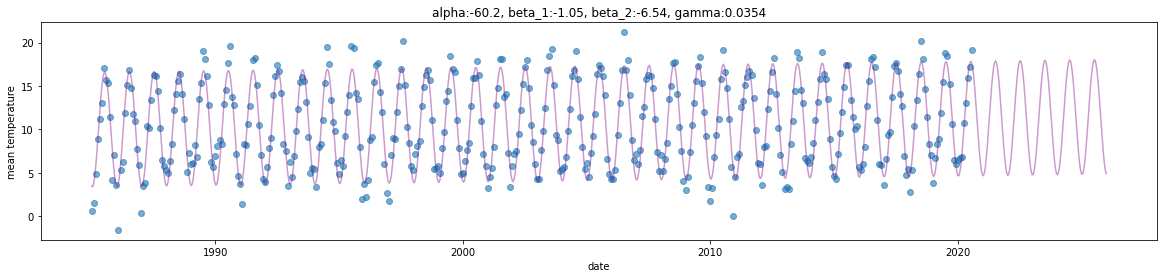

In [25]:
# make predictions
new_t2 = np.linspace(1985,2026,1000)
new_features = np.column_stack([np.sin(2*np.pi*new_t2),np.cos(2*np.pi*new_t2),new_t2])
new_y2 = model2.predict(new_features)

# plot the graph
fig,ax = plt.subplots(figsize=(20,4))
ax.scatter(temp['date'],temp['tmean'],alpha = 0.6)
ax.plot(new_t2, new_y2, c="purple", alpha = 0.4)
ax.set_xlabel('date')
ax.set_ylabel('mean temperature')
ax.set_title(f'alpha:{alpha:.3}, beta_1:{beta_1:.3}, beta_2:{beta_2:.3}, gamma:{gamma:.3}')
plt.show()

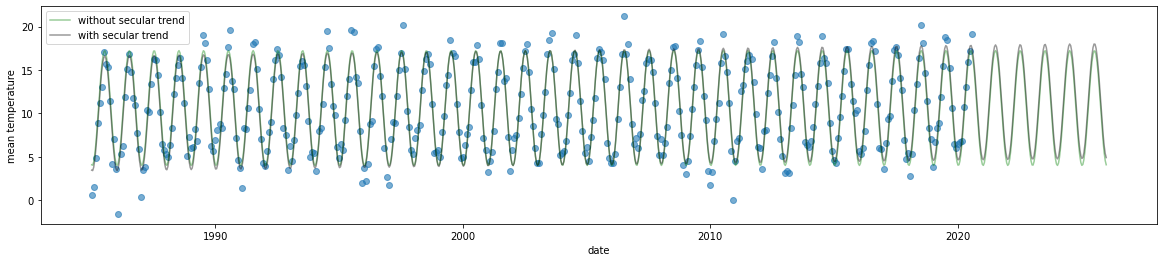

In [26]:
# plot the graph
fig,ax = plt.subplots(figsize=(20,4))
ax.scatter(temp['date'],temp['tmean'],alpha = 0.6)
ax.plot(new_t, new_y, c="green", alpha = 0.4, label = 'without secular trend')
ax.plot(new_t2, new_y2, c="black", alpha = 0.4, label = "with secular trend")
ax.set_xlabel('date')
ax.set_ylabel('mean temperature')
ax.legend()
plt.show()

In [27]:
# Racial bias
import os
if os.path.exists('stop-and-search.csv'):
  print("file already downloaded.")
else:
  !wget "https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/stop-and-search.csv"
police = pd.read_csv('stop-and-search.csv')

--2021-12-12 23:57:01--  https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/stop-and-search.csv
Resolving www.cl.cam.ac.uk (www.cl.cam.ac.uk)... 128.232.0.20, 2a05:b400:110::80:14
Connecting to www.cl.cam.ac.uk (www.cl.cam.ac.uk)|128.232.0.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 312976614 (298M) [text/csv]
Saving to: ‘stop-and-search.csv’

stop-and-search.csv 100%[===================>] 298.48M  29.4MB/s    in 11s     

2021-12-12 23:57:13 (26.7 MB/s) - ‘stop-and-search.csv’ saved [312976614/312976614]



In [28]:
isna_num = len(police[police['outcome'].isna()])
isempty_num = len(police[police['outcome']==""])
isna_num, isempty_num

(17800, 0)

In [29]:
police[police['outcome'].isna()]['outcome']

47         NaN
406        NaN
414        NaN
424        NaN
473        NaN
          ... 
1013303    NaN
1013348    NaN
1013500    NaN
1013680    NaN
1013700    NaN
Name: outcome, Length: 17800, dtype: object

In [30]:
eth = police.loc[(police['officer_defined_ethnicity'].isna()==False) & (police['outcome'].isna()==False)].copy()
eth = eth.rename(columns={"officer_defined_ethnicity":"ethnicity"})
eth_group = list(set(eth['ethnicity']))
eth = eth.loc[:,['ethnicity','outcome']].reset_index()
eth_group

['Other', 'Mixed', 'White', 'Asian', 'Black']

In [31]:
eth[:5]

,index,ethnicity,outcome
0,0,Asian,Arrest
1,1,Other,Caution (simple or conditional)
2,2,Asian,A no further action disposal
3,3,Black,A no further action disposal
4,4,Asian,A no further action disposal


In [32]:
X = np.column_stack([np.ones(len(eth))] +[np.where(eth['ethnicity']==k,1,0) for k in eth_group])
X.shape, np.linalg.matrix_rank(X)

((928633, 6), 5)

In [33]:
eth.groupby('ethnicity').count().reset_index()

,ethnicity,index,outcome
0,Asian,124048,124048
1,Black,252186,252186
2,Mixed,1617,1617
3,Other,27549,27549
4,White,523233,523233


In [34]:
eth.groupby('outcome').count().reset_index()

,outcome,index,ethnicity
0,A no further action disposal,436058,436058
1,Arrest,86505,86505
2,Article found - Detailed outcome unavailable,5929,5929
3,Caution (simple or conditional),2748,2748
4,Community resolution,34089,34089
5,False,221837,221837
6,Khat or Cannabis warning,17279,17279
7,Local resolution,7767,7767
8,Offender cautioned,1548,1548
9,Offender given drugs possession warning,24778,24778


In [35]:
eth_count = eth.groupby(['ethnicity','outcome']).count().reset_index()
[f"{k}:{len(eth_count.loc[(eth_count['ethnicity']==k) & (eth_count['outcome']!='False')]) / len(eth_count.loc[(eth_count['ethnicity']==k)])}"
      for k in eth_group]

['Other:0.9333333333333333',
 'Mixed:0.9375',
 'White:0.9375',
 'Asian:0.9375',
 'Black:0.9375']

In [36]:
X_ind = np.column_stack([np.where(eth['ethnicity']==k,1,0) for k in eth_group if k != 'Asian'])
y = np.where(eth['outcome']!='False',1,0)
X_ind.shape,np.linalg.matrix_rank(X_ind)

((928633, 4), 4)

In [37]:
X_ind,y

(array([[0, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0]]), array([1, 1, 1, ..., 0, 1, 0]))

In [38]:
model_rac = sklearn.linear_model.LinearRegression()
model_rac.fit(X_ind,y)

LinearRegression()

In [39]:
alpha,betas = model_rac.intercept_,model_rac.coef_
level = [k for k in eth_group if k != 'Asian']
(alpha,betas,level)

(0.7821085386302078,
 array([-0.01394998,  0.13502195, -0.02744857, -0.01969905]),
 ['Other', 'Mixed', 'White', 'Black'])

In [40]:
eth_group

['Other', 'Mixed', 'White', 'Asian', 'Black']

In [41]:
print(f'α = {alpha}')
eth_group_exclude_asian = eth_group
eth_group_exclude_asian.remove('Asian')
for k,β in zip(eth_group_exclude_asian, betas):
    print(f'β[{k}] = {β}')

α = 0.7821085386302078
β[Other] = -0.013949984780703185
β[Mixed] = 0.13502194992885097
β[White] = -0.02744856878885614
β[Black] = -0.01969904722307167


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


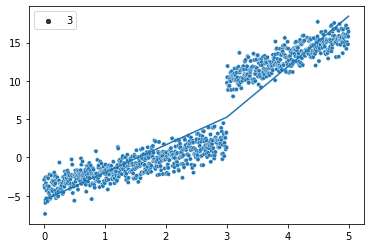

In [42]:
import scipy, seaborn as sns
def f(β, x, y, knot):
  β0,β1,β2 = β
  return np.sum(np.power(y-(β0+β1*x+β2*(x-knot)*np.where(x>=3,1,0)),2))
def pred(β, x, knot):
  β0,β1,β2 = β
  return β0+β1*x+β2*(x-knot)*np.where(x>=3,1,0)

x = np.linspace(0,5,1000)
y = np.array([np.where(i>=3, 3 * i + 1 + np.random.normal(0, 1), 2 * i - 4 + np.random.normal(0, 1)) for i in x])
β = scipy.optimize.fmin(lambda β: f(β, x, y, 3), (1,1,1), maxiter=100)

sns.scatterplot(x,y,size=3)
sns.lineplot(x, pred(β,x,3))
plt.show()

In [43]:
n = 5000
k = np.random.choice(4, p=[.65,.25,.05,.05], size=n)
t = np.random.uniform(size=n)
pi = np.pi
r = 1 # x^2 + y^2 = r^2

# choose from four parts - the circle, the mouth, the left eye and the right eye
# the mouth: y = 2x^2 - 1/2
x = np.column_stack([r*np.cos(2*pi*t), 0.9*t-0.45, -0.28*np.ones(n), 0.28*np.ones(n)])
y = np.column_stack([r*np.sin(2*pi*t), 2*np.power(0.9*t-0.45, 2) - 0.5, 0.28*np.ones(n), 0.28*np.ones(n)])
xy = np.column_stack([x[np.arange(n), k], y[np.arange(n), k]])
xy = np.random.normal(loc=xy, scale=.06)
xy

array([[ 0.21778812, -1.04686469],
       [ 0.48878872, -0.14085743],
       [-0.49942636, -0.88077052],
       ...,
       [ 1.03049347, -0.00948589],
       [ 0.35567676,  0.40547681],
       [-0.54867702,  0.89158846]])

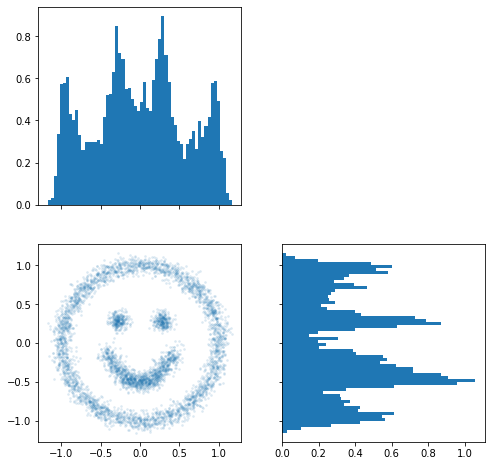

In [44]:
fig,((ax_x,dummy),(ax_xy,ax_y)) = plt.subplots(2,2, figsize=(8,8), sharex='col', sharey='row')
dummy.remove()
ax_xy.scatter(xy[:,0], xy[:,1], s=3, alpha=.1)
ax_x.hist(xy[:, 0], density=True, bins=60)
ax_y.hist(xy[:, 1], density=True, bins=60, orientation='horizontal')
plt.show()